# Tanner Christensen
## Math 403
## Pandas I

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1

In [8]:
series1 = pd.Series(-3*np.ones(5), index=np.arange(2,12)[::2])
series1

2    -3.0
4    -3.0
6    -3.0
8    -3.0
10   -3.0
dtype: float64

In [9]:
d = {'Bill': 31, 'Sarah': 28, 'Jane': 34, 'Joe': 26}
series2 = pd.Series(d)
series2

Bill     31
Jane     34
Joe      26
Sarah    28
dtype: int64

## Problem 2

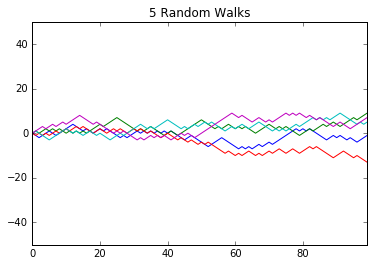

In [13]:
for _ in xrange(5):
    N = 100
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .5, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    s.plot()
    plt.ylim([-50, 50])
    plt.title("5 Random Walks")

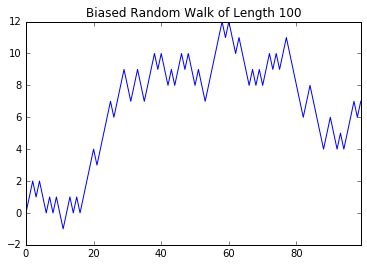

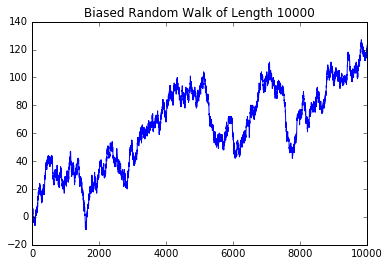

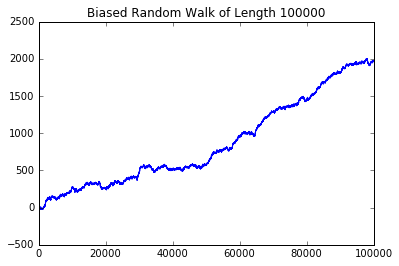

In [18]:
for N in [100,10000,100000]:
    s = np.zeros(N)
    s[1:] = np.random.binomial(1, .51, size=(N-1,))*2-1 #coin flips
    s = pd.Series(s)
    s = s.cumsum() # random walk
    s.plot()
    plt.title("Biased Random Walk of Length " + str(N))
    plt.show()

## Problem 3

In [19]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [23]:
studentInfo[(studentInfo["Age"] > 19) & 
            (studentInfo["Sex"] == 'M')][["ID", "Name"]]

ID   Name
0   0  Mylan
6   6   Matt

## Problem 4

In [26]:
pd.merge(studentInfo, otherInfo, on="ID")[studentInfo["Sex"] == 'M'][["ID", "Age", "GPA"]]

ID  Age  GPA
0   0   20  3.8
2   2   18  3.0
4   4   19  2.8
6   6   20  3.8
7   7   19  3.4

## Problem 5

**Import Crime Data**

In [37]:
df = pd.read_csv("crime_data.txt", index_col=0, header=1)
df

Population     Total  Violent  Property  Murder  Forcible-Rape  Robbery  \
Year                                                                            
1960   179323175   3384200   288460   3095700    9110          17190   107840   
1961   182992000   3488000   289390   3198600    8740          17220   106670   
1962   185771000   3752200   301510   3450700    8530          17550   110860   
1963   188483000   4109500   316970   3792500    8640          17650   116470   
1964   191141000   4564600   364220   4200400    9360          21420   130390   
1965   193526000   4739400   387390   4352000    9960          23410   138690   
1966   195576000   5223500   430180   4793300   11040          25820   157990   
1967   197457000   5903400   499930   5403500   12240          27620   202910   
1968   199399000   6720200   595010   6125200   13800          31670   262840   
1969   201385000   7410900   661870   6749000   14760          37170   298850   
1970   203235298   8098000   738820   7359200   16000          37990   349860   
1971   206212000   8588200   816500   7771700   17780          42260   387700   
1972   208230000   8248800   834900   7413900   18670          46850   376290   
1973   209851000   8718100   875910   7842200   19640          51400   384220   
1974   211392000  10253400   974720   9278700   20710          55400   442400   
1975   213124000  11292400  1039710  10252700   20510          56090   470500   
1976   214659000  11349700  1004210  10345500   18780          57080   427810   
1977   216332000  10984500  1029580   9955000   19120          63500   412610   
1978   218059000  11209000  1085550  10123400   19560          67610   426930   
1979   220099000  12249500  1208030  11041500   21460          76390   480700   
1980   225349264  13408300  1344520  12063700   23040          82990   565840   
1981   229146000  13423800  1361820  12061900   22520          82500   592910   
1982   231534000  12974400  1322390  11652000   21010          78770   553130   
1983   233981000  12108600  1258090  10850500   19310          78920   506570   
1984   236158000  11881800  1273280  10608500   18690          84230   485010   
1985   238740000  12431400  1328800  11102600   18980          88670   497870   
1986   240132887  13211869  1489169  11722700   20613          91459   542775   
1987   242282918  13508700  1483999  12024700   20096          91110   517704   
1988   245807000  13923100  1566220  12356900   20680          92490   542970   
1989   248239000  14251400  1646040  12605400   21500          94500   578330   
1990   248709873  14475600  1820130  12655500   23440         102560   639270   
1991   252177000  14872900  1911770  12961100   24700         106590   687730   
1992   255082000  14438200  1932270  12505900   23760         109060   672480   
1993   257908000  14144800  1926020  12218800   24530         106010   659870   
1994   260341000  13989500  1857670  12131900   23330         102220   618950   
1995   262755000  13862700  1798790  12063900   21610          97470   580510   
1996   265228572  13493863  1688540  11805300   19650          96250   535590   
1997   267637000  13194571  1634770  11558175   18208          96153   498534   
1998   270296000  12475634  1531044  10944590   16914          93103   446625   
1999   272690813  11634378  1426044  10208334   15522          89411   409371   
2000   281421906  11608072  1425486  10182586   15586          90178   408016   
2001   285317559  11876669  1439480  10437480   16037          90863   423557   
2002   287973924  11878954  1423677  10455277   16229          95235   420806   
2003   290690788  11826538  1383676  10442862   16528          93883   414235   
2004   293656842  11679474  1360088  10319386   16148          95089   401470   
2005   296507061  11565499  1390745  10174754   16740          94347   417438   
2006   299398484  11401511  1418043   9983568   17030          92757   447403   
2007   301621157  11251828  1408337  

**Add "Crime_Rate" Column to the data Frame**

In [38]:
df["Crime_Rate"] = df.Total/df.Population
df[["Crime_Rate"]]

Crime_Rate
Year            
1960    0.018872
1961    0.019061
1962    0.020198
1963    0.021803
1964    0.023881
1965    0.024490
1966    0.026708
1967    0.029897
1968    0.033702
1969    0.036800
1970    0.039845
1971    0.041647
1972    0.039614
1973    0.041544
1974    0.048504
1975    0.052985
1976    0.052873
1977    0.050776
1978    0.051404
1979    0.055655
1980    0.059500
1981    0.058582
1982    0.056037
1983    0.051750
1984    0.050313
1985    0.052071
1986    0.055019
1987    0.055756
1988    0.056642
1989    0.057410
1990    0.058203
1991    0.058978
1992    0.056602
1993    0.054844
1994    0.053735
1995    0.052759
1996    0.050876
1997    0.049300
1998    0.046155
1999    0.042665
2000    0.041248
2001    0.041626
2002    0.041250
2003    0.040684
2004    0.039773
2005    0.039006
2006    0.038081
2007    0.037305
2008    0.036667
2009    0.035058
2010    0.033504
2011    0.032924
2012    0.032461

**Plot Crime Rate as a function of Year**

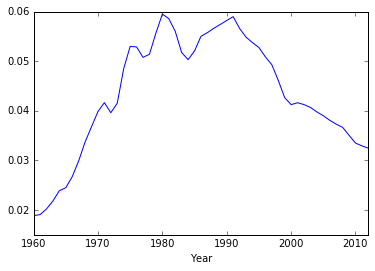

In [39]:
df.Crime_Rate.plot()

**List 5 years with highest crime rate in descending order**

In [62]:
df.sort_values("Crime_Rate", ascending=False).index[:5]

Int64Index([1980, 1991, 1981, 1990, 1989], dtype='int64', name=u'Year')

**Calculate average number of total crimes as well as burglary crimes between 1960 and 2012**

In [65]:
avg_burg = df.Burglary.mean()
avg_tot = df.Total.mean()

print "Average Burglary: " + str(avg_burg)
print "Average Total: " + str(avg_tot)

Average Burglary: 2446286.20755
Average Total: 10638068.0755


**Find the years for which the total number of crimes was above average and the years for which it was below average**

In [67]:
df[(df.Total < avg_tot) & (df.Burglary > avg_burg)].index[:2]

Int64Index([1973, 1974], dtype='int64', name=u'Year')

**Plot number of murders as a function of the population**

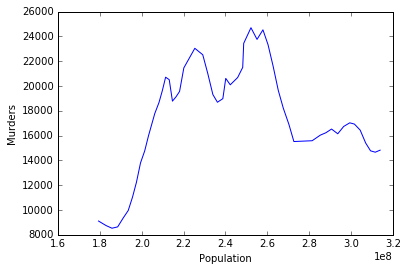

In [69]:
plt.plot(df.Population, df.Murder)
plt.xlabel("Population")
plt.ylabel("Murders")

**Select Population, Violent, and Robbery columns for all years in the 1980's and save this subset to the file "crime_subset.txt"**

In [74]:
df_subset = df.loc[1980:1989][["Population", "Violent", "Robbery"]]
df_subset.to_csv("crime_subset.txt")
df_subset

Population  Violent  Robbery
Year                              
1980   225349264  1344520   565840
1981   229146000  1361820   592910
1982   231534000  1322390   553130
1983   233981000  1258090   506570
1984   236158000  1273280   485010
1985   238740000  1328800   497870
1986   240132887  1489169   542775
1987   242282918  1483999   517704
1988   245807000  1566220   542970
1989   248239000  1646040   578330